In [14]:
from pretrainedModel import pretrainedModel

In [15]:
from tensorflow import keras
from PIL import Image
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
image = Image.fromarray(x_train[0]).convert('RGB')

In [16]:
model = pretrainedModel()
model(image).shape

torch.Size([2048])

In [17]:
image

In [18]:
y_train[0]

5

In [19]:
import torch.nn as nn
import torch

n_hash = 32

model2 = nn.Sequential(nn.Linear( 2048 , 128 ),
                     nn.ReLU(),
                     nn.Linear( 128 ,64),
                     nn.ReLU(),
                     nn.Linear(64, n_hash ),
                     nn.Sigmoid()
                     )

In [20]:
model2(model(image))

tensor([0.4847, 0.4586, 0.4945, 0.4615, 0.5026, 0.4934, 0.4893, 0.4696, 0.4678,
        0.5193, 0.5226, 0.4797, 0.5078, 0.4880, 0.4836, 0.4939, 0.5209, 0.5059,
        0.4882, 0.4794, 0.5146, 0.4642, 0.4801, 0.5278, 0.5061, 0.5008, 0.4997,
        0.5072, 0.4899, 0.5159, 0.5223, 0.5040], grad_fn=<SigmoidBackward0>)

In [21]:
for i in range(len(y_train)):
    if y_train[i] == 5:
        print(i)
    
    if i == 50: break


0
11
35
47


In [22]:
p = Image.fromarray(x_train[11]).convert('RGB')
p

In [23]:
n = Image.fromarray(x_train[2]).convert('RGB')
n

In [24]:
import torch.optim as optim

triplet_loss = nn.TripletMarginLoss(margin=1.0, p=2, eps=1e-7)
optimizer = optim.SGD(model2.parameters(),lr=0.7, momentum=0.9)

In [25]:
anchor = model2(model(image))
pExam =  model2(model(p))
nExam =  model2(model(n))

optimizer.zero_grad()

loss = triplet_loss(
            torch.stack([anchor,anchor]), 
            torch.stack([pExam,pExam]), 
            torch.stack([nExam,nExam]))

loss.backward()
loss

tensor(0.9983, grad_fn=<MeanBackward0>)

In [26]:
torch.stack([anchor,anchor])

tensor([[0.4847, 0.4586, 0.4945, 0.4615, 0.5026, 0.4934, 0.4893, 0.4696, 0.4678,
         0.5193, 0.5226, 0.4797, 0.5078, 0.4880, 0.4836, 0.4939, 0.5209, 0.5059,
         0.4882, 0.4794, 0.5146, 0.4642, 0.4801, 0.5278, 0.5061, 0.5008, 0.4997,
         0.5072, 0.4899, 0.5159, 0.5223, 0.5040],
        [0.4847, 0.4586, 0.4945, 0.4615, 0.5026, 0.4934, 0.4893, 0.4696, 0.4678,
         0.5193, 0.5226, 0.4797, 0.5078, 0.4880, 0.4836, 0.4939, 0.5209, 0.5059,
         0.4882, 0.4794, 0.5146, 0.4642, 0.4801, 0.5278, 0.5061, 0.5008, 0.4997,
         0.5072, 0.4899, 0.5159, 0.5223, 0.5040]], grad_fn=<StackBackward0>)

--------

In [27]:
labels = ["A", "A", "B", "B"]
def pre_triplet(labels):
    data = {}
    for i in range(len(labels)):
        d = {}
        d["N"] = [j for j in range(len(labels)) if (i != j) and (labels[i] != labels[j])]
        d["P"] = [j for j in range(len(labels)) if (i != j) and (labels[i] == labels[j])]
        
        data[i] = d

    return data

pre_triplet(labels)

{0: {'N': [2, 3], 'P': [1]},
 1: {'N': [2, 3], 'P': [0]},
 2: {'N': [0, 1], 'P': [3]},
 3: {'N': [0, 1], 'P': [2]}}

In [28]:
APN = pre_triplet( y_train[:10] )
APN

{0: {'N': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'P': []},
 1: {'N': [0, 2, 3, 4, 5, 6, 7, 8, 9], 'P': []},
 2: {'N': [0, 1, 3, 4, 5, 6, 7, 8], 'P': [9]},
 3: {'N': [0, 1, 2, 4, 5, 7, 9], 'P': [6, 8]},
 4: {'N': [0, 1, 2, 3, 5, 6, 7, 8, 9], 'P': []},
 5: {'N': [0, 1, 2, 3, 4, 6, 7, 8, 9], 'P': []},
 6: {'N': [0, 1, 2, 4, 5, 7, 9], 'P': [3, 8]},
 7: {'N': [0, 1, 2, 3, 4, 5, 6, 8, 9], 'P': []},
 8: {'N': [0, 1, 2, 4, 5, 7, 9], 'P': [3, 6]},
 9: {'N': [0, 1, 3, 4, 5, 6, 7, 8], 'P': [2]}}

In [29]:
APN = pre_triplet( y_train[:10] )
APN_combos = [ [[(a,p,n) for p in APN[a]["P"] ] for n in APN[a]["N"]] for a in APN]
APN_combos

[[[], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], []],
 [[(2, 9, 0)],
  [(2, 9, 1)],
  [(2, 9, 3)],
  [(2, 9, 4)],
  [(2, 9, 5)],
  [(2, 9, 6)],
  [(2, 9, 7)],
  [(2, 9, 8)]],
 [[(3, 6, 0), (3, 8, 0)],
  [(3, 6, 1), (3, 8, 1)],
  [(3, 6, 2), (3, 8, 2)],
  [(3, 6, 4), (3, 8, 4)],
  [(3, 6, 5), (3, 8, 5)],
  [(3, 6, 7), (3, 8, 7)],
  [(3, 6, 9), (3, 8, 9)]],
 [[], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], []],
 [[(6, 3, 0), (6, 8, 0)],
  [(6, 3, 1), (6, 8, 1)],
  [(6, 3, 2), (6, 8, 2)],
  [(6, 3, 4), (6, 8, 4)],
  [(6, 3, 5), (6, 8, 5)],
  [(6, 3, 7), (6, 8, 7)],
  [(6, 3, 9), (6, 8, 9)]],
 [[], [], [], [], [], [], [], [], []],
 [[(8, 3, 0), (8, 6, 0)],
  [(8, 3, 1), (8, 6, 1)],
  [(8, 3, 2), (8, 6, 2)],
  [(8, 3, 4), (8, 6, 4)],
  [(8, 3, 5), (8, 6, 5)],
  [(8, 3, 7), (8, 6, 7)],
  [(8, 3, 9), (8, 6, 9)]],
 [[(9, 2, 0)],
  [(9, 2, 1)],
  [(9, 2, 3)],
  [(9, 2, 4)],
  [(9, 2, 5)],
  [(9, 2, 6)],
  [(9, 2, 7)],
  [(9, 2, 8)]]]

In [30]:
from torchvision import models, transforms

toTensor = transforms.ToTensor()

sample_size = 100
xSub = x_train[:sample_size]
ySub = y_test[:sample_size]

xTensor = toTensor(xSub).permute(1, 0, 2).reshape(len(xSub), 1, 28, 28)

xTensor.shape

torch.Size([100, 1, 28, 28])

In [31]:
import torch.nn as nn

In [32]:
model = nn.Sequential(nn.Flatten(),
                      nn.Linear(28*28 , 14*14),
                      nn.Linear(14*14, 32),
                      nn.Sigmoid()
                      )

In [33]:
results = model(xTensor)
results

tensor([[0.5533, 0.5066, 0.5255,  ..., 0.5205, 0.4575, 0.5080],
        [0.5310, 0.5284, 0.5424,  ..., 0.5382, 0.4207, 0.5168],
        [0.5263, 0.4696, 0.4819,  ..., 0.5129, 0.4712, 0.5069],
        ...,
        [0.4833, 0.4904, 0.5460,  ..., 0.5346, 0.4067, 0.4989],
        [0.5433, 0.5104, 0.5363,  ..., 0.5276, 0.4580, 0.5137],
        [0.5028, 0.5016, 0.4954,  ..., 0.5053, 0.4574, 0.5061]],
       grad_fn=<SigmoidBackward0>)

In [34]:
a_list = []
p_list = []
n_list = []

for apn in [item for row in [item for row in APN_combos for item in row] for item in row]: # just flattens APN_combos matrix and loops over it.
    a_list.append(results[ apn[0] ])
    p_list.append(results[ apn[1] ])
    n_list.append(results[ apn[2] ])

In [35]:
import torch.optim as optim
import torch

criterion = nn.TripletMarginLoss(margin=1.0, p=2, eps=1e-7)
optimizer = optim.SGD(model.parameters(),lr=0.7, momentum=0.9)

In [36]:
optimizer.zero_grad()

loss = criterion(
                torch.stack(a_list),
                torch.stack(p_list),
                torch.stack(n_list)
                )
print(loss)
loss.backward()
optimizer.step()

tensor(0.9577, grad_fn=<MeanBackward0>)


-------------

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

# Step 1: Perform K-Means Clustering
def kmeans_clustering(hash_codes, n_clusters=10, n_init=10, random_state=42):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=random_state)
    clusters = kmeans.fit_predict(hash_codes)
    return clusters

# Step 2: Build the label-cluster matrix
def build_label_cluster_matrix(clusters, true_labels, n_clusters=10):
    # Initialize a matrix to count label-cluster relationships  
    label_cluster_matrix = np.zeros((10, n_clusters), dtype=int)
    
    for label, cluster in zip(true_labels, clusters):
        label_cluster_matrix[label][cluster] += 1
    
    return label_cluster_matrix

# Step 3: Visualize the result as a heatmap
def plot_heatmap(label_cluster_matrix):
    plt.figure(figsize=(10, 6))
    sns.heatmap(label_cluster_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
    plt.title("Label Distribution Across Clusters")
    plt.xlabel("Clusters")
    plt.ylabel("True Labels")
    plt.show()


def easyHeatmap(hashCodes, labels):
    raw_clusters = kmeans_clustering(hashCodes, n_clusters=10)

    raw_label_cluster_matrix = build_label_cluster_matrix(raw_clusters, labels)

    plot_heatmap(raw_label_cluster_matrix)

----

In [70]:
from torchvision import models, transforms
import torch.nn as nn
import torch.optim as optim
import torch
import random

toTensor = transforms.ToTensor()

sample_size = 20
xSub = x_train[:sample_size]
ySub = y_test[:sample_size]

xTensor = toTensor(xSub).permute(1, 0, 2).reshape(len(xSub), 1, 28, 28)

xTensor.shape

torch.Size([20, 1, 28, 28])

In [71]:
APN = pre_triplet( ySub )
APN_combos = [ [[(a,p,n) for p in APN[a]["P"] ] for n in APN[a]["N"]] for a in APN]
APN_combos

[[[(0, 17, 1)],
  [(0, 17, 2)],
  [(0, 17, 3)],
  [(0, 17, 4)],
  [(0, 17, 5)],
  [(0, 17, 6)],
  [(0, 17, 7)],
  [(0, 17, 8)],
  [(0, 17, 9)],
  [(0, 17, 10)],
  [(0, 17, 11)],
  [(0, 17, 12)],
  [(0, 17, 13)],
  [(0, 17, 14)],
  [(0, 17, 15)],
  [(0, 17, 16)],
  [(0, 17, 18)],
  [(0, 17, 19)]],
 [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []],
 [[(2, 5, 0), (2, 14, 0)],
  [(2, 5, 1), (2, 14, 1)],
  [(2, 5, 3), (2, 14, 3)],
  [(2, 5, 4), (2, 14, 4)],
  [(2, 5, 6), (2, 14, 6)],
  [(2, 5, 7), (2, 14, 7)],
  [(2, 5, 8), (2, 14, 8)],
  [(2, 5, 9), (2, 14, 9)],
  [(2, 5, 10), (2, 14, 10)],
  [(2, 5, 11), (2, 14, 11)],
  [(2, 5, 12), (2, 14, 12)],
  [(2, 5, 13), (2, 14, 13)],
  [(2, 5, 15), (2, 14, 15)],
  [(2, 5, 16), (2, 14, 16)],
  [(2, 5, 17), (2, 14, 17)],
  [(2, 5, 18), (2, 14, 18)],
  [(2, 5, 19), (2, 14, 19)]],
 [[(3, 10, 0), (3, 13, 0)],
  [(3, 10, 1), (3, 13, 1)],
  [(3, 10, 2), (3, 13, 2)],
  [(3, 10, 4), (3, 13, 4)],
  [(3, 10, 5), (3, 13, 5)],
  [(3

In [86]:
model = nn.Sequential(  nn.Flatten(),
                        nn.Linear(28*28,512),
                        nn.ReLU(),
                        nn.Linear(512,256),
                        nn.ReLU(),
                        nn.Linear(256,32),
                        nn.Sigmoid()
                        )

criterion = nn.TripletMarginLoss(p=1, # Manhatten Distance
                                 margin=32
                                 )
optimizer = optim.SGD( model.parameters() )

for i in range(3000):
    results = model(xTensor)

    # === make anchor, positive, negeative lists ===
    
    random.shuffle(APN_combos)

    a_list = []
    p_list = []
    n_list = []

    for apn in [item for row in [item for row in APN_combos for item in row] for item in row]: # just flattens APN_combos matrix and loops over it.
        a_list.append(results[ apn[0] ])
        p_list.append(results[ apn[1] ])
        n_list.append(results[ apn[2] ])
    
    # === Improve model ===
    optimizer.zero_grad()

    loss = criterion(torch.stack(a_list),
                     torch.stack(p_list),
                     torch.stack(n_list) )
    
    loss.backward()
    optimizer.step()

    print(loss)

tensor(32.0042, grad_fn=<MeanBackward0>)
tensor(32.0036, grad_fn=<MeanBackward0>)
tensor(32.0029, grad_fn=<MeanBackward0>)
tensor(32.0023, grad_fn=<MeanBackward0>)
tensor(32.0017, grad_fn=<MeanBackward0>)
tensor(32.0011, grad_fn=<MeanBackward0>)
tensor(32.0004, grad_fn=<MeanBackward0>)
tensor(31.9998, grad_fn=<MeanBackward0>)
tensor(31.9991, grad_fn=<MeanBackward0>)
tensor(31.9985, grad_fn=<MeanBackward0>)
tensor(31.9979, grad_fn=<MeanBackward0>)
tensor(31.9972, grad_fn=<MeanBackward0>)
tensor(31.9966, grad_fn=<MeanBackward0>)
tensor(31.9960, grad_fn=<MeanBackward0>)
tensor(31.9953, grad_fn=<MeanBackward0>)
tensor(31.9947, grad_fn=<MeanBackward0>)
tensor(31.9940, grad_fn=<MeanBackward0>)
tensor(31.9934, grad_fn=<MeanBackward0>)
tensor(31.9928, grad_fn=<MeanBackward0>)
tensor(31.9921, grad_fn=<MeanBackward0>)
tensor(31.9915, grad_fn=<MeanBackward0>)
tensor(31.9908, grad_fn=<MeanBackward0>)
tensor(31.9902, grad_fn=<MeanBackward0>)
tensor(31.9896, grad_fn=<MeanBackward0>)
tensor(31.9889, 

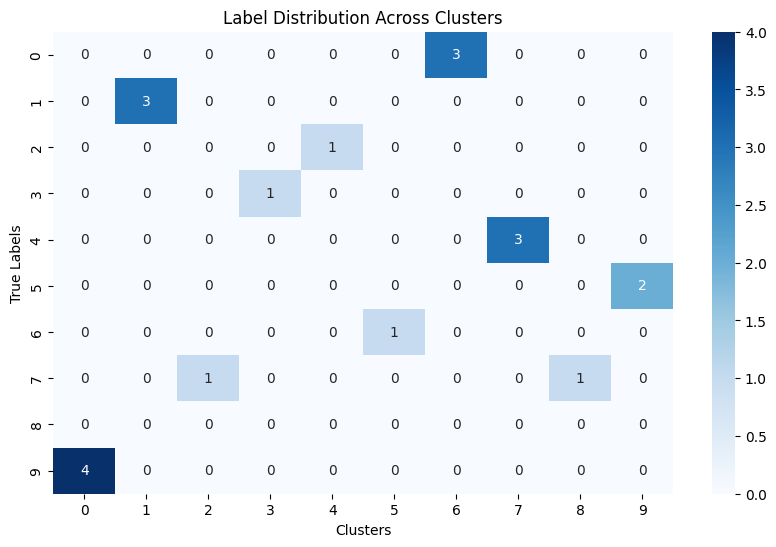

In [87]:
easyHeatmap(model(xTensor).detach().numpy(), ySub)

In [88]:
model(xTensor).detach().numpy()

array([[8.4655899e-01, 1.5923597e-01, 1.5643173e-01, 8.4446138e-01,
        1.6688046e-01, 8.4323269e-01, 8.4295130e-01, 1.6948000e-01,
        1.5862754e-01, 8.2036150e-01, 1.6500705e-01, 1.5329339e-01,
        8.3924448e-01, 1.3700649e-01, 8.4079182e-01, 1.7935428e-01,
        1.5465362e-01, 1.6813806e-01, 8.4852868e-01, 8.5207653e-01,
        1.7937595e-01, 8.3844328e-01, 8.3473271e-01, 8.3905888e-01,
        8.5016996e-01, 1.6514461e-01, 1.6239625e-01, 8.2761842e-01,
        1.5421712e-01, 8.3789915e-01, 8.5280603e-01, 1.7662188e-01],
       [2.3858193e-02, 9.7751325e-01, 9.7990292e-01, 2.0138090e-02,
        9.8122817e-01, 2.3044208e-02, 2.0490626e-02, 9.7945029e-01,
        9.8124492e-01, 1.5880184e-02, 9.7728765e-01, 9.7909361e-01,
        1.8447693e-02, 9.7631776e-01, 2.1055384e-02, 9.7792745e-01,
        9.8160583e-01, 9.8118788e-01, 2.1652272e-02, 2.7405826e-02,
        9.7896427e-01, 1.9711101e-02, 2.1166651e-02, 2.0955481e-02,
        2.2812748e-02, 9.7727793e-01, 9.7999030